#### Import Statements 

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import datetime as dt

#### Loading the Data Files 

--------

In [2]:
dt_df = pd.read_csv("PandasSampleData/ETH_1h.csv")

 ----------

- The pd.to_datetime( ) Method 

> The pd.to_datetime() mehod converts specified iterables (columns of a DataFrame, list etc.) to Pandas DateTimeIndex object.

In [3]:
dt_df["Date"] = pd.to_datetime(dt_df["Date"], format="%Y-%m-%d %I-%p")

> Format Codes : https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [4]:
# Handling Unix Time

> Unix time is a system for describing a point in time. It is the number of seconds that have elapsed since the Unix epoch, minus leap seconds; the Unix epoch is 00:00:00 UTC on 1 January 1970 (an arbitrary date); leap seconds are ignored, with a leap second having the same Unix time as the second before it, and every day is treated as if it contains exactly 86400 seconds. Due to this treatment Unix time is not a true representation of UTC.

In [5]:
sd = ["1376543", "12345678", "2345678", "653234567", "12345876", "Hi, How are you?"]
sdt = pd.to_datetime(sd, unit= "s", errors= "coerce")

- The pd.date_range( ) Method

In [6]:
sample_dates = pd.date_range(start="Jan 12, 2012", end="Jun 16, 2012", freq="3D")

> Note: 'freq' takes DateOfset Objects as parameters. See the available DateOfsets at - https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects. An additional argument named 'periods', that pd.date_range() takes is an integer that represent how many DateStamps to produce; based on, the provided values of 'start' or 'end' (either one not both) and the 'freq' parameters.

## Working with pandas DateTime Objects

> There are several time/date properties (i.e., day, year, month, day_name etc.) that one can access from Timestamp or a collection of timestamps like a DatetimeIndex.

> To know about all the available Date/Time Components head to https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components

> Note: If you have a Series with datetimelike values, then you can access these properties via the .dt accessor.

In [7]:
sdt[0].day_name();

In [8]:
dt_df["Date"].dt.day_name().sample(3);

> Note: Usual arithmetic operations & functions (i.e. mean, max, min etc.) can be performed on a DateTimeIndex Series object.

In [9]:
dt_df["Date"].max() - dt_df["Date"].min()  # returns a Timedelta object of the time span between those dates

Timedelta('986 days 09:00:00')

### Resampling 

> Resampling generates a unique sampling distribution on the basis of the actual data. We can apply various frequency to resample our time series data. This is a very important technique in the field of analytics. Most commonly used time series frequency are –

    W : weekly frequency
    M : month end frequency
    SM : semi-month end frequency (15th and end of month)
    Q : quarter end frequency

---------

In [10]:
tesla = data.DataReader("TSLA", "yahoo", "1 Jan, 2018", dt.datetime.now())

------------

In [11]:
tesla["Close"].resample("M").mean().tail(3)
# the above command will find the mean closing price of each month for a duration of 12 months.

Date
2020-11-30    465.612498
2020-12-31    638.818640
2021-01-31    811.980994
Freq: M, Name: Close, dtype: float64

In [12]:
tesla.resample("Q").max().sample(3).sort_index()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-31,75.898003,73.349998,75.000000,75.358002,137127500.0,75.358002
2019-03-31,70.400002,68.830002,69.241997,69.461998,120754000.0,69.461998
2021-03-31,884.489990,838.750000,856.000000,880.020020,74661000.0,880.020020


<AxesSubplot:xlabel='Date'>

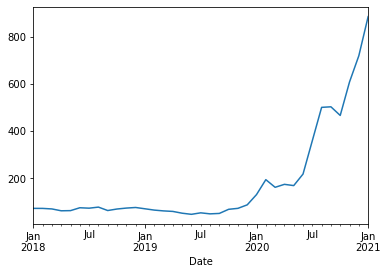

In [13]:
tesla["High"].resample("M").max().plot()